# Learning objectives

Today we learn about data distributions.

We will learn to visualize data to investigate the four main characteristics: Center, Spread, Dependence, and Shape. These tools include: rug plots, histograms, kde plots, box plots and scatter plots.

And we will finish off by explaining how we describe the shape of data.

# Why Visualize
This may seem obvious to you, and if it does then you are probably a visual person. For those who think this question should be asked, you have my empathy. Generally speaking visuals just don't help me understand the material better. 

So why visualize?


Well it turns out that most people are visual people, so in presentations and essays, visuals help out. But the second reason is something we will talk a lot about in data science. In data science it is important to check your results, and one of the ways that you do this is by taking two different approaches to the same problem. If they both match up, then you can feel that much better about the results. And if they don't then it can lead you to cool discoveries.

Visualization can therefore help out in a ton of ways:

1. Checking for outliers
2. Better understanding the distribution of a feature
3. Understand how features relate to each other
4. etc.

You might be asking yourself, wait we just learned that summary statistics can do this too. But remember, two ways are better than one. Summary statistics can point to obvious problems but subtle ones generally pop up better with visualizatons.

## Assumptions

As always, we will start off with our assumptions:

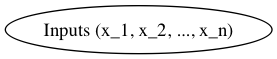

In [1]:
import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

G = nx.DiGraph()
G.add_node('Inputs (x_1, x_2, ..., x_n)')
draw(G)

Pretty simple, it's the same as last time. We just have the data. So speaking of data, let's get some:

In [2]:
data = {
    'quantitative1': [1, 4, 6, 10, 15, 16],
    'quantitative2': [4, 6, 12, 13, 16, 19],
    'qualitative': ['red', 'blue', 'red', 'blue', 'yellow', 'red']
}

## Distribution What?

I used an odd word before, perhaps one that you have not seen before, it's distribution. Data scientists often talk about how the data is distributed or what its distribution is. What they mean to talk about is how the data is placed along the number line. Sometimes the data is placed in such a way that it is spread out. Other times it is placed such that it is very concentrated or has some points that are placed that are a lot more positive than other points. In fact data does not have to be just placed along the number line. It can be placed in the cartesian plane or even in three dims!

## Plotting the distribution

What would be the best way to visualize our data? Well simply put, it would be to show what our data looks like! A bit too obvious right. But how would this look? If we were trying to visualize a single feature one way to do it would be to use a rug plot:

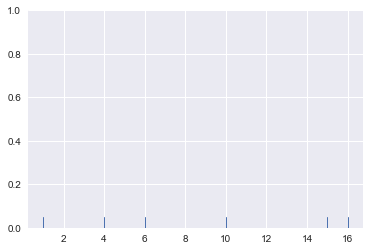

In [5]:
%matplotlib inline
import seaborn as sns

sns.rugplot(data['quantitative1'])

Do you see it? This is your first chance to view a distribution (how your data points are distributed/placed over the range of your data). Looking at the distribution can tell you a lot about it. Max, min, where the data is centered, and so on. At each datapoint we put a little tickmark. It is like putting our data points on a number line. You can understand that this will easily fail when we have more than a couple of points. The ticks will overlap, they will be hard to see, etc. To get around this we can use another visualization of a distribution called a histogram:

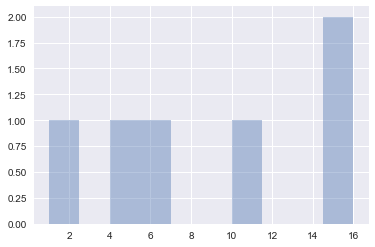

In [8]:
sns.distplot(data['quantitative1'], bins=10, hist=True, kde=False)

This is another way to visualize what your data looks like. On the x axis we have the number that represents your data point. And on the y axis we have the count of the data points that fall within the bins. This can give a an awesome feel for where the data is. It can point out outliers, show where the data is centered, and show how the data is spread.

There is one more common way to visualize the distribution of your data, this is called a KDE (kernel density estimation). Think of it like a smooth histogram. If you are curious how it is constructed you should check out my other video [here](https://www.youtube.com/watch?v=-Lt7kpTM-v8&index=4&list=PLgJhDSE2ZLxYlhQx0UfVlnF1F7OWF-9rp)

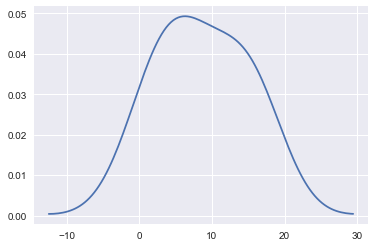

In [10]:
import numpy as np

sns.kdeplot(np.array(data['quantitative1']))

And of course, you can do all three:

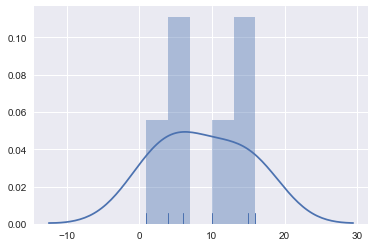

In [12]:
sns.distplot(data['quantitative1'], bins=5, hist=True, kde=True)
sns.rugplot(data['quantitative1'])

The final way that you can visualize a distribution is by using a box plot. This is a bit different from the other ways that we have used before:

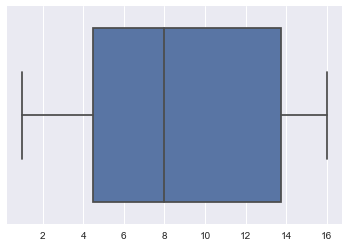

In [16]:
sns.boxplot(data['quantitative1'])

There are a couple of things to pay attention to here. First is the solid line in the center, this is the median. The box covers the inner quartiles (going from the end of the first quartile to the end of third quartile). The "whiskers" or the lines on the far right and left are either 2 or 1.5 inner quartile ranges (the span of one quartile). Any points outside the whiskers will be plotted as well.

These are just a couple of tools to do this, there are plenty more! So if you are interested check out: [Seaborn Understanding the Weird Parts](https://www.youtube.com/watch?v=fWuPIGVPo7o&list=PLgJhDSE2ZLxYlhQx0UfVlnF1F7OWF-9rp)

## Visualizing multiple distributions

Often times you will have a couple of features that you will want to visualize. You can visualize them separately, but often by visualizing them together you can gain more insights.

The common way to do this is with a simple scatterplot:

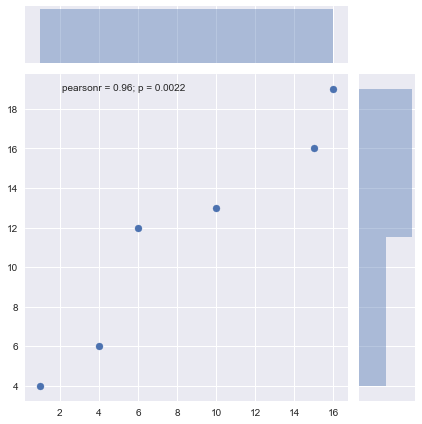

In [15]:
sns.jointplot(
    np.array(data['quantitative1']), 
    np.array(data['quantitative2']))

We get so many goodies with this one. Again we just put a little mark for each datapoint we have on the cartesian plane. But we can clearly see a trend in the data. If one feature/dimension is large, the other is likely large as well. We could have guessed this from the correlation (seen in the upper left hand corner)

## The Shape of data

Remember, there are four things that these visualizations are helping us look for:

1. Center
2. Spread
3. Dependence
4. Shape

We have talked about the first three, and hopefully you know how to tell where the center is (mean, median, look at a histogram or a boxplot, etc.), you know how to tell how spread out the data is (standard deviation, look at a KDE plot or a boxplot, etc.), you know how to check the dependence of multiple factors (look at a correlation matrix or a scatter plot, etc.). 

But you probably don't know what we mean when we say shape. So as the final part of our visual exploration, let's explore skewness and kurtosis. Let's look at two distributions:

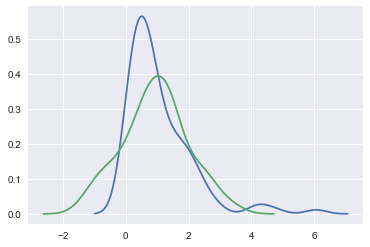

In [37]:
center = np.random.normal(1, 1, size=100)
rskew = np.random.gamma(1, size=100)

sns.kdeplot(rskew)
sns.kdeplot(center)

We have a blue and a green distribution (remember a smoothed histogram showing where the data points are). These distributions are different right? But how? You might not believe me, but the means of these two distributions are the same (in fact the area under these two curves are the same, 1).

So how are they different? 

Well one of these distributions fans out equally on both sides and the other one fans out only on one side (the right side). The blue one fans out on the right side and we call this distribution right skewed (or has positive skewness). This means that the blue data has some very large outliers! People also refer to these types of distributions (blue looking) as having a fat right tail. 

Now check out these two:

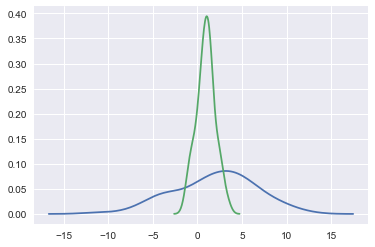

In [38]:
fat_tails = np.random.normal(1, 4, size=100)

sns.kdeplot(fat_tails)
sns.kdeplot(center)

We again have a blue and a green distribution. These distributions are different right? Again you might not believe me, but the means of these two distributions are the same (in fact the area under these two curves are the same, 1). How are these guys different.



But they are very different. One has a large spread of data and the other has a smaller one (the blue one has more kurtosis). 

Just so you get a feel for this, the blue one also has higher spread (a standard deviation of 4 instead of 1)

## Why does all of this matter?

Well this is the big question. We have our four properties that we are interested in: 

1. Center
2. Spread
3. Dependence
4. Shape

And now you have tools to measure these quantities. But why were we curious about them in the first place?

Well as we progress in this class you will begin to understand why (as more about the weird world of data science is revealed to you). But unfortunately you also will just learn by experience. One great resource to give you a feel for these things (but perhaps only after we have advanced a bit more in the class) is [Data Talks](https://www.youtube.com/watch?v=4Aimp4i5M0c)


## What's Next?

Next up we will be expanding our assumptions a bit and diving into what a probability distribution and random variable are. So hold on tight, we are in lot more learning.

# Learning objectives

Today we learn about data distributions.

We will learn to visualize data to investigate the four main characteristics: Center, Spread, Dependence, and Shape. These tools include: rug plots, histograms, kde plots, box plots and scatter plots.

And we will finish off by explaining how we describe the shape of data.

## Comprehension questoins:

1. Could you make a qualitative distribution of data? 
1. What are the problems with visualizing data with a rug plot?
1. What are ways to view the distribution of your data?
1. How do you read a histogram? 
1. Why is it useful to view the distribution of your data?
1. How would you visualize the distribution of 2D data? 3D? XD?
1. Are there any problems with using a scatterplot to visualize the data?
1. In common English how would you describe two features that are positively correlated? Negatively correlated?
1. Do non-skewed data distributions have negative points?
1. What sort of data in real life have right skewed distributions?
1. What sort of data in real life have high spread distributions?
1. Are summary statistics or data visualizations better? 
